In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

Import two seperate dataframs that contain the same information.

In [14]:
df = pd.read_csv('data/wine_data1.csv')
df.drop(columns='Unnamed: 0',inplace=True)

Tasks todo:
- identify the characteristics of a 'good' wine
    - what should be considered good
    - what kinds of wine are rated the highest
    - what descriptions of wine lead to the highest rating
    - can you predict the price of the wine based on description
    - can you predict the score of the win based on description
    - is there any correlation between expensive and cheap wines
- create word clouds for:
    - descriptions of good and bad wines
    - descriptions of cheap and expensive wines

Steps from NLP notebook from class
- Text analytics and NLP
- Pre-Prosessing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
- Feature Engineering for NLP
    - Bag-of-Words
    - Term frequency-Inverse Document Frequency (tf-idf)
- Text Classification
    - Use features from text to detect satire
- Next Steps/Project Ideas :)
    - Document clustering: Latent Dirichlet Allocation (LDA), Latent Semantic Analysis(LSA) 
    - Word Embeddings

### Identifying what a good wine is

In [15]:
df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


From this I will consider a good wine to be over a 90 in points.

#### Creating a bag of words for good and bad wines

In [27]:
# seperating the wines into two dataframes of good and bad
good = df[df.points >= 90]
bad = df[df.points < 90]

In [28]:
# creating a large bag of all words contained in descriptions
#    of good and bad words
good_word_wstop = list(good.description)
bad_word_wstop = list(bad.description)

In [29]:
# joining list of descriptions into one string
good_words = ' '.join(good_word_wstop)
bad_words = ' '.join(bad_word_wstop)

In [30]:
# tokenizing each string into list of single words
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
good_tokens = tokenizer.tokenize(good_words)
bad_tokens = tokenizer.tokenize(bad_words)

# lowercasing all words so that they match stop words
good_tokens = [x.lower() for x in good_tokens]
bad_tokens = [x.lower() for x in bad_tokens]

In [31]:
# going to remove stop words first
stop_words = set(stopwords.words('english'))
good_word_bag = []
bad_word_bag = []
# iterating through each list to not include stop words
#     could be done with zip but not consequences of good and bad
#     being different lenghts
for word in good_tokens:
    if word not in stop_words:
        good_word_bag.append(word)
for word in bad_tokens:
    if word not in stop_words:
        bad_word_bag.append(word)

In [32]:
good_fdist = FreqDist(good_word_bag)
bad_fdist = FreqDist(bad_word_bag)

In [33]:
good_fdist

FreqDist({'wine': 34996, 'flavors': 22485, 'fruit': 21772, 'tannins': 14032, 'black': 12153, 'ripe': 11435, 'rich': 11370, 'acidity': 11300, 'finish': 10936, 'cherry': 10679, ...})

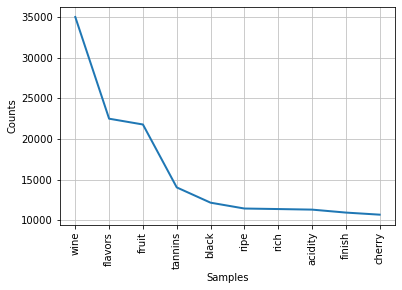

In [34]:
good_fdist.plot(10)

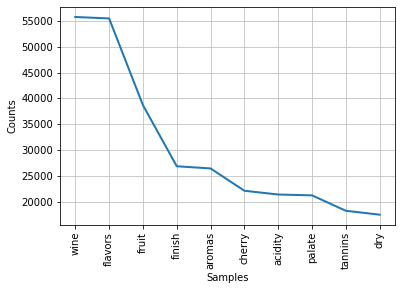

In [35]:
bad_fdist.plot(10)

#### Stemming and Lemming

#### TF-IDF

#### Are good wines differently priced than bad wines

Going to do a one-tailed z-test (because we have good sample size) to determine if the price of the wine makes a wine good or bad.

* Ho = good and bad wines are the same price
* Ha = good wines are more expensive then bad wines

In [25]:
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


In [56]:
df.dropna(axis=0,subset=['price','points'],inplace=True)

In [57]:
df.isna().sum()

country            5
description        0
designation    42311
points             0
price              0
province           5
region_1       22842
region_2       76531
variety            0
winery             0
dtype: int64

In [58]:
# subsetting the wines into good and bad scoring wines
good_sample = df[df.points >= 90].sample(n=100)
bad_sample = df[df.points < 90].sample(n=100)

In [59]:
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats

In [66]:
# just looking at means to get intiial impression
print('Mean good price = {}'.format(np.mean(good_sample.price)))
print('Mean bad price = {}'.format(np.mean(bad_sample.price)))

Mean good price = 54.31
Mean bad price = 22.58


In [69]:
test_stat,pvalue = statsmodels.stats.weightstats.ztest(good_sample.price,bad_sample.price)
print('test_stat = {}'.format(test_stat))
print('p value = {}\n'.format(pvalue))
if pvalue < 0.05:
    print('Good wines are more expensive')
else:
    print('Good and bad wines cost the same')

test_stat = 5.882248455809173
p value = 4.0473016753641104e-09

Good wines are more expensive


From this we can see that there is a significant difference between good and bad rated wines. The p-value is much smaller than 0.05 so we cna see with 95% confidence that there is a difference in price.

# Going to use the description to predict if a wine is good or bad
Features = the words in the description

Target = if the win is good or bad (points >= 9)